In [205]:
import pandas as pd # Loading the review corpus for each product
x=pd.read_csv(r"C:\Users\Monish Bangera\Desktop\BIA660_PROJECT\Final_file_NLP.csv")

In [206]:

x=x.iloc[:,1:] # Removing unwanted columns

In [207]:
import en_core_web_sm 
import string
import re
from nltk.tokenize import word_tokenize 
import string
from nltk import sent_tokenize
    
from nltk.corpus import stopwords
nlp = en_core_web_sm.load()
def preprocess(doc): # Preprocess the texts, remove leading and trailing spaces
    s=[]
    for i in sent_tokenize(doc):
        s.append(i.strip(string.punctuation))
    return s 

def merge_dict(x):
    d = {}
    for dictionary in x:
        d.update(dictionary)
    return d
def aspect_dis(doc): # get aspect and description specific keys. eg camera
    aspect=[]
    description=[]
    for k, values in doc.items():
        for value in values:
        
            if arg == k.lower():
           
                description.append(value)
            else:
                pass
    return ",".join(description)


In [208]:

from collections import defaultdict # Aspect description tagging 
# Aspects are noun and Descriptions are adjectives and adverbs
import nltk
def tag_parser(doc, aspect_tag=['NN', 'NNS','NNPS','NNP'], description_tag= ['JJ','JJR','JJS','RB','RBR','RBS','RP']):
    sents = nltk.sent_tokenize(doc) # find another tool 
    
    out_dict = defaultdict(list)
    
    for sent in sents:
        tokens = nltk.word_tokenize(sent)
        tagged_tokens = nltk.pos_tag(tokens)
        aspect = " ".join([word for word, t in tagged_tokens if t in aspect_tag])
        description = " ".join([word for word, t in tagged_tokens if t in description_tag])

        out_dict[aspect].append(description)
    return out_dict


In [209]:
def apply_aspect(x): # Apply aspect tagging on each tokenized sentences
    l=[]
    for i in x:
        l.append(tag_parser(i))
    return l
    

In [210]:
x.dropna(axis=0,inplace=True) # Getting rid of nulls 

In [211]:
%%time
x['sents'] = x['Review'].apply(preprocess) # Tokenizing Review corpus into sentences

Wall time: 6.83 s


In [212]:
%%time
x['aspect_description']=x['sents'].apply(apply_aspect) # Get Aspect description default dict for each sentence of product review

Wall time: 8min 57s


In [213]:
x['aspect_description'][0]

[defaultdict(list, {'Bobby Nov Google pixel phone': ['still good']}),
 defaultdict(list, {'pros cons': ['']}),
 defaultdict(list,
             {'Dude phone photos selfie camers trust audio beautiful eyes harm themBobby Nov Google pixel phone': ['best ever still best also awesome screen doesnt still good']}),
 defaultdict(list, {'pros cons': ['']}),
 defaultdict(list,
             {'experience battery downfall phone hours version usage update Q1 everything': ['greatest barely not only that first android little buggy not daily however new']}),
 defaultdict(list,
             {'camera buggy chargers wireless charging flagship grade body snapdragon processor': ['however superb android little really good fast quite fast']}),
 defaultdict(list,
             {'battery bugs software id Nov im planning phone': ['so minor itreshi']}),
 defaultdict(list, {'phone hold years': ['next']}),
 defaultdict(list, {'U mobile': ['']}),
 defaultdict(list, {'Android u': ['last upgrade']}),
 defaultdict(list,

In [214]:
%%time
x['final_aspect_description']=x['aspect_description'].apply(merge_dict) # merge dictionary

Wall time: 83.3 ms


In [215]:
arg='camera'                                   # Change arg to get different aspects
x[arg] = x['final_aspect_description'].apply(aspect_dis, arg)

In [216]:
arg='price'                                   # Change arg to get different aspects
x[arg] = x['final_aspect_description'].apply(aspect_dis, arg)

In [217]:
arg='battery'                                   # Change arg to get different aspects
x[arg] = x['final_aspect_description'].apply(aspect_dis, arg)

In [218]:
arg='phone'                                   # Change arg to get different aspects
x[arg] = x['final_aspect_description'].apply(aspect_dis, arg)

In [219]:
arg='charging'                                   # Change arg to get different aspects
x[arg] = x['final_aspect_description'].apply(aspect_dis, arg)

In [220]:
arg='sound'                                   # Change arg to get different aspects
x[arg] = x['final_aspect_description'].apply(aspect_dis, arg)

In [221]:
arg='sim'                                   # Change arg to get different aspects
x[arg] = x['final_aspect_description'].apply(aspect_dis, arg)

In [222]:
arg='size'                                   # Change arg to get different aspects
x[arg] = x['final_aspect_description'].apply(aspect_dis, arg)

In [223]:
arg='fingerprint'                                   # Change arg to get different aspects
x[arg] = x['final_aspect_description'].apply(aspect_dis, arg)

In [224]:
arg='chipset'                                   # Change arg to get different aspects
x[arg] = x['final_aspect_description'].apply(aspect_dis, arg)

In [225]:
arg='headphone'                                   # Change arg to get different aspects
x[arg] = x['final_aspect_description'].apply(aspect_dis, arg)

In [226]:
arg='cpu'                                   # Change arg to get different aspects
x[arg] = x['final_aspect_description'].apply(aspect_dis, arg)

In [227]:
arg='gpu'                                   # Change arg to get different aspects
x[arg] = x['final_aspect_description'].apply(aspect_dis, arg)

In [228]:
arg='nfc'                                   # Change arg to get different aspects
x[arg] = x['final_aspect_description'].apply(aspect_dis, arg)

In [229]:
arg='display'                                   # Change arg to get different aspects
x[arg] = x['final_aspect_description'].apply(aspect_dis, arg)

In [230]:
arg='sensor'                                   # Change arg to get different aspects
x[arg] = x['final_aspect_description'].apply(aspect_dis, arg)

In [232]:
x # DataSet after applying various functions. We can see we get a sparse matrix

,Product,Review,Price,sents,aspect_description,final_aspect_description,camera,price,battery,phone,...,sim,size,fingerprint,chipset,headphone,cpu,gpu,nfc,display,sensor
0,Pixel,"Bobby , 10 Nov 2021\nIs the Google pixel 3xl s...",600,"[Bobby , 10 Nov 2021\nIs the Google pixel 3xl ...",[{'Bobby Nov Google pixel phone': ['still good...,{'Bobby Nov Google pixel phone': ['still good'...,"perfect,dual",True,"good,also n't",stupid more Totally,...,not physical,also big,,,,,,,,
1,Pixel 2,I'm planning to get the Pixel 1 or 2 to store ...,600,[I'm planning to get the Pixel 1 or 2 to store...,"[{'Pixel photos': ['']}, {'Thanks Pal9 Oct Hel...","{'Pixel photos': [''], 'Thanks Pal9 Oct Hello ...",really good,same,"Small,too small too",Even fine other bad then bad,...,,,,,,,,,,
2,Pixel 2 XL,"Anonymous, 26 Nov 2021\never since the 11 upda...",600,"[Anonymous, 26 Nov 2021\never since the 11 upd...",[{'Anonymous Nov keys keyboard stick i': ['eve...,{'Anonymous Nov keys keyboard stick i': ['ever...,"dual,",,"great,removable",,...,dual,,,,,,,,soooo much better now,
3,Pixel 3,Phone is ok when you have wfi but when your po...,600,[Phone is ok when you have wfi but when your p...,[{'Phone power screwed internet texts pngs Nov...,{'Phone power screwed internet texts pngs Nov ...,",improved",not worth,not measly Maybe actually decent,"sure as soon possible,Essential",...,,also actually much better anyway easier,,,,,,,also not particularly bright,
4,Pixel 4,"Battery of the past.5.81"" inci, with punch hol...",600,"[Battery of the past.5.81"" inci, with punch ho...",[{'Battery past.5.81 inci hole cam': ['punch']...,"{'Battery past.5.81 inci hole cam': ['punch'],...",,,,n't,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Galaxy Xcover 4,"Little bit slow, but a great phoneMatandriuss,...",470,"[Little bit slow, but a great phoneMatandriuss...",[{'bit phoneMatandriuss Sep Hi': ['Little slow...,{'bit phoneMatandriuss Sep Hi': ['Little slow ...,,great little,big,not correctly,...,,,,,,,,,,
264,Gear S2 classic,"AnonD-145588, 30 Nov 2016\nHello I have questi...",470,"[AnonD-145588, 30 Nov 2016\nHello I have quest...",[{'AnonD-145588 Nov Hello question Smart phone...,{'AnonD-145588 Nov Hello question Smart phones...,,,,,...,,,,,,,,,,
265,Gear S2 classic 3G,"AnonD-145588, 30 Nov 2016\nHello I have questi...",470,"[AnonD-145588, 30 Nov 2016\nHello I have quest...",[{'AnonD-145588 Nov Hello question Smart phone...,{'AnonD-145588 Nov Hello question Smart phones...,,,,,...,,,,,,,,,,
266,Gear S3 classic LTE,Hi! Why doesn't the LTE version appear on Sams...,470,"[Hi, Why doesn't the LTE version appear on Sam...","[{'Hi': ['']}, {'LTE version Samsung website':...","{'Hi': [''], 'LTE version Samsung website': ['...",,,,,...,,,,,,,,,,


In [233]:
import numpy as np # We replace all the blank "" with np.nan 
x['camera']=(x['camera'].replace("",np.nan))
x['price']=(x['price'].replace("",np.nan))
x['battery']=(x['battery'].replace("",np.nan))
x['phone']=(x['phone'].replace("",np.nan))
x['charging']=(x['charging'].replace("",np.nan))
x['sound']=(x['sound'].replace("",np.nan))
x['sim']=(x['sim'].replace("",np.nan))
x['size']=(x['size'].replace("",np.nan))
x['fingerprint']=(x['fingerprint'].replace("",np.nan))
x['chipset']=(x['chipset'].replace("",np.nan))
x['headphone']=(x['headphone'].replace("",np.nan))
x['cpu']=(x['cpu'].replace("",np.nan))
x['gpu']=(x['gpu'].replace("",np.nan))
x['nfc']=(x['nfc'].replace("",np.nan))
x['display']=(x['display'].replace("",np.nan))
x['sensor']=(x['sensor'].replace("",np.nan))


In [236]:
x.isnull().sum() # Only camera,price,phone,battery,display have more non null values, we drop the rest

Product                       0
Review                        0
Price                         0
sents                         0
aspect_description            0
final_aspect_description      0
camera                      173
price                       179
battery                     173
phone                       143
charging                    245
sound                       236
sim                         243
size                        235
fingerprint                 259
chipset                     256
headphone                   265
cpu                         262
gpu                         261
nfc                         265
display                     190
sensor                      263
dtype: int64

In [237]:
x.drop(['charging','sound','sim','size','fingerprint','chipset','headphone','cpu','gpu','nfc','sensor'],axis=1,inplace=True)

In [238]:
x.head() 

,Product,Review,Price,sents,aspect_description,final_aspect_description,camera,price,battery,phone,display
0,Pixel,"Bobby , 10 Nov 2021\nIs the Google pixel 3xl s...",600,"[Bobby , 10 Nov 2021\nIs the Google pixel 3xl ...",[{'Bobby Nov Google pixel phone': ['still good...,{'Bobby Nov Google pixel phone': ['still good'...,"perfect,dual",True,"good,also n't",stupid more Totally,NaN
1,Pixel 2,I'm planning to get the Pixel 1 or 2 to store ...,600,[I'm planning to get the Pixel 1 or 2 to store...,"[{'Pixel photos': ['']}, {'Thanks Pal9 Oct Hel...","{'Pixel photos': [''], 'Thanks Pal9 Oct Hello ...",really good,same,"Small,too small too",Even fine other bad then bad,NaN
2,Pixel 2 XL,"Anonymous, 26 Nov 2021\never since the 11 upda...",600,"[Anonymous, 26 Nov 2021\never since the 11 upd...",[{'Anonymous Nov keys keyboard stick i': ['eve...,{'Anonymous Nov keys keyboard stick i': ['ever...,"dual,",NaN,"great,removable",NaN,soooo much better now
3,Pixel 3,Phone is ok when you have wfi but when your po...,600,[Phone is ok when you have wfi but when your p...,[{'Phone power screwed internet texts pngs Nov...,{'Phone power screwed internet texts pngs Nov ...,",improved",not worth,not measly Maybe actually decent,"sure as soon possible,Essential",also not particularly bright
4,Pixel 4,"Battery of the past.5.81"" inci, with punch hol...",600,"[Battery of the past.5.81"" inci, with punch ho...",[{'Battery past.5.81 inci hole cam': ['punch']...,"{'Battery past.5.81 inci hole cam': ['punch'],...",NaN,NaN,NaN,n't,NaN


In [240]:
x.isnull().sum() # Check Nulls

Product                       0
Review                        0
Price                         0
sents                         0
aspect_description            0
final_aspect_description      0
camera                      173
price                       179
battery                     173
phone                       143
display                     190
dtype: int64

In [241]:
d=x.copy()

In [242]:
d.dropna(inplace=True) # Drop nulls

In [248]:
d.head() 

,Product,Review,Price,sents,aspect_description,final_aspect_description,camera,price,battery,phone,display
3,Pixel 3,Phone is ok when you have wfi but when your po...,600,[Phone is ok when you have wfi but when your p...,[{'Phone power screwed internet texts pngs Nov...,{'Phone power screwed internet texts pngs Nov ...,",improved",not worth,not measly Maybe actually decent,"sure as soon possible,Essential",also not particularly bright
11,Pixel C,Phone is ok when you have wfi but when your po...,600,[Phone is ok when you have wfi but when your p...,[{'Phone power screwed internet texts pngs Nov...,{'Phone power screwed internet texts pngs Nov ...,",improved",not worth,not measly Maybe actually decent,"sure as soon possible,Essential",also not particularly bright
48,iPhone SE (2020),"Anonymous, 02 Dec 2021\nBecause they're both c...",1000,"[Anonymous, 02 Dec 2021\nBecause they're both ...","[{'Anonymous Dec iPhones': ['compact']}, {'spe...","{'Anonymous Dec iPhones': ['compact'], 'specs ...","good as well,",Again,"Larger,decent not great,",small practical suitable,",still"
63,iPhone 6s,"samsunggalaxya9 , 25 Jan 2016\nsamsung is the ...",490,"[samsunggalaxya9 , 25 Jan 2016\nsamsung is the...","[{'samsunggalaxya9 Jan samsung': ['best']}, {'...","{'samsunggalaxya9 Jan samsung': ['best'], 'Iph...","not sure,amazing as well",same more Iphone better,best as much possible,n't new yearly,durable
64,iPhone 6s Plus,Android guy here\nBack in the day I loved the ...,490,[Android guy here\nBack in the day I loved the...,[{'Android guy Back day s7 edge': ['here back ...,{'Android guy Back day s7 edge': ['here back t...,better,Not worthy,Now low,"so,good not",bigger na too small


In [256]:
def price(x): # Convert price column to categorical. 500 is median price. Less than that is Low and greater than that is high.
    if x<500:
        return "Low"
    else:
        return "High"


In [257]:
d["Price"]=d["Price"].apply(price) # apply to dataframe

In [280]:
d # Final Data set

,Product,Review,Price,sents,aspect_description,final_aspect_description,camera,price,battery,phone,display
3,Pixel 3,Phone is ok when you have wfi but when your po...,High,[Phone is ok when you have wfi but when your p...,[{'Phone power screwed internet texts pngs Nov...,{'Phone power screwed internet texts pngs Nov ...,",improved",not worth,not measly Maybe actually decent,"sure as soon possible,Essential",also not particularly bright
11,Pixel C,Phone is ok when you have wfi but when your po...,High,[Phone is ok when you have wfi but when your p...,[{'Phone power screwed internet texts pngs Nov...,{'Phone power screwed internet texts pngs Nov ...,",improved",not worth,not measly Maybe actually decent,"sure as soon possible,Essential",also not particularly bright
48,iPhone SE (2020),"Anonymous, 02 Dec 2021\nBecause they're both c...",High,"[Anonymous, 02 Dec 2021\nBecause they're both ...","[{'Anonymous Dec iPhones': ['compact']}, {'spe...","{'Anonymous Dec iPhones': ['compact'], 'specs ...","good as well,",Again,"Larger,decent not great,",small practical suitable,",still"
63,iPhone 6s,"samsunggalaxya9 , 25 Jan 2016\nsamsung is the ...",Low,"[samsunggalaxya9 , 25 Jan 2016\nsamsung is the...","[{'samsunggalaxya9 Jan samsung': ['best']}, {'...","{'samsunggalaxya9 Jan samsung': ['best'], 'Iph...","not sure,amazing as well",same more Iphone better,best as much possible,n't new yearly,durable
64,iPhone 6s Plus,Android guy here\nBack in the day I loved the ...,Low,[Android guy here\nBack in the day I loved the...,[{'Android guy Back day s7 edge': ['here back ...,{'Android guy Back day s7 edge': ['here back t...,better,Not worthy,Now low,"so,good not",bigger na too small
65,iPhone 7,"Krishna, 25 Nov 2021\nAnd i want to buy it any...",Low,"[Krishna, 25 Nov 2021\nAnd i want to buy it an...","[{'Krishna Nov': ['anyhow n't anywhere']}, {'B...","{'Krishna Nov': ['anyhow n't anywhere'], 'Bruh...","superb,also better",Not,"tiny tiny,long","ugh.bad,absolutely awesome",n't sure
66,iPhone 7 Plus,"Krishna, 25 Nov 2021\nAnd i want to buy it any...",Low,"[Krishna, 25 Nov 2021\nAnd i want to buy it an...","[{'Krishna Nov': ['anyhow n't anywhere']}, {'B...","{'Krishna Nov': ['anyhow n't anywhere'], 'Bruh...","superb,also better",Not,"tiny tiny,long","ugh.bad,absolutely awesome",n't sure
123,Galaxy A01 Core,"Razer, 19 Oct 2021\nDoes anyone know how to se...",Low,"[Razer, 19 Oct 2021\nDoes anyone know how to s...",[{'Razer Oct Does anyone speed dials model': [...,{'Razer Oct Does anyone speed dials model': ['...,n't that great,Even cheap not,now non-removable,personally,perfect great
154,Galaxy Note20,"Muzik, 25 Nov 2021\nYa, battery life is not go...",Low,"[Muzik, 25 Nov 2021\nYa, battery life is not g...","[{'Muzik Nov Ya battery life': ['not good']}, ...","{'Muzik Nov Ya battery life': ['not good'], 'B...",however quiet better,"same,",so bad,"Now,up quickly",not user friendly
156,Galaxy Note20 Ultra,"Muzik, 25 Nov 2021\nYa, battery life is not go...",Low,"[Muzik, 25 Nov 2021\nYa, battery life is not g...","[{'Muzik Nov Ya battery life': ['not good']}, ...","{'Muzik Nov Ya battery life': ['not good'], 'B...",however quiet better,"same,",so bad,"Now,up quickly",not user friendly


In [259]:
d['Price'].value_counts()

Low     18
High    11
Name: Price, dtype: int64

In [260]:
import nltk # Vader for sentiment analysis
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Monish
[nltk_data]     Bangera\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [261]:
d.head()

,Product,Review,Price,sents,aspect_description,final_aspect_description,camera,price,battery,phone,display
3,Pixel 3,Phone is ok when you have wfi but when your po...,High,[Phone is ok when you have wfi but when your p...,[{'Phone power screwed internet texts pngs Nov...,{'Phone power screwed internet texts pngs Nov ...,",improved",not worth,not measly Maybe actually decent,"sure as soon possible,Essential",also not particularly bright
11,Pixel C,Phone is ok when you have wfi but when your po...,High,[Phone is ok when you have wfi but when your p...,[{'Phone power screwed internet texts pngs Nov...,{'Phone power screwed internet texts pngs Nov ...,",improved",not worth,not measly Maybe actually decent,"sure as soon possible,Essential",also not particularly bright
48,iPhone SE (2020),"Anonymous, 02 Dec 2021\nBecause they're both c...",High,"[Anonymous, 02 Dec 2021\nBecause they're both ...","[{'Anonymous Dec iPhones': ['compact']}, {'spe...","{'Anonymous Dec iPhones': ['compact'], 'specs ...","good as well,",Again,"Larger,decent not great,",small practical suitable,",still"
63,iPhone 6s,"samsunggalaxya9 , 25 Jan 2016\nsamsung is the ...",Low,"[samsunggalaxya9 , 25 Jan 2016\nsamsung is the...","[{'samsunggalaxya9 Jan samsung': ['best']}, {'...","{'samsunggalaxya9 Jan samsung': ['best'], 'Iph...","not sure,amazing as well",same more Iphone better,best as much possible,n't new yearly,durable
64,iPhone 6s Plus,Android guy here\nBack in the day I loved the ...,Low,[Android guy here\nBack in the day I loved the...,[{'Android guy Back day s7 edge': ['here back ...,{'Android guy Back day s7 edge': ['here back t...,better,Not worthy,Now low,"so,good not",bigger na too small


In [269]:
df

,Product,Review,Price,sents,aspect_description,final_aspect_description,camera,price,battery,phone,...,cam_compound,battery_compound,price_compound,phone_compound,display_compound,cam_compound_tag,battery_compound_tag,price_compound_tag,phone_compound_tag,display_compound_tag
3,Pixel 3,Phone is ok when you have wfi but when your po...,High,[Phone is ok when you have wfi but when your p...,[{'Phone power screwed internet texts pngs Nov...,{'Phone power screwed internet texts pngs Nov ...,",improved",not worth,not measly Maybe actually decent,"sure as soon possible,Essential",...,0.4767,0.0000,-0.1695,-0.1695,-0.3865,Positive,Neutral,Negative,Negative,Negative
11,Pixel C,Phone is ok when you have wfi but when your po...,High,[Phone is ok when you have wfi but when your p...,[{'Phone power screwed internet texts pngs Nov...,{'Phone power screwed internet texts pngs Nov ...,",improved",not worth,not measly Maybe actually decent,"sure as soon possible,Essential",...,0.4767,0.0000,-0.1695,-0.1695,-0.3865,Positive,Neutral,Negative,Negative,Negative
48,iPhone SE (2020),"Anonymous, 02 Dec 2021\nBecause they're both c...",High,"[Anonymous, 02 Dec 2021\nBecause they're both ...","[{'Anonymous Dec iPhones': ['compact']}, {'spe...","{'Anonymous Dec iPhones': ['compact'], 'specs ...","good as well,",Again,"Larger,decent not great,",small practical suitable,...,0.6124,-0.5096,0.0000,0.0000,0.0000,Positive,Negative,Neutral,Neutral,Neutral
63,iPhone 6s,"samsunggalaxya9 , 25 Jan 2016\nsamsung is the ...",Low,"[samsunggalaxya9 , 25 Jan 2016\nsamsung is the...","[{'samsunggalaxya9 Jan samsung': ['best']}, {'...","{'samsunggalaxya9 Jan samsung': ['best'], 'Iph...","not sure,amazing as well",same more Iphone better,best as much possible,n't new yearly,...,-0.2057,0.6369,0.4902,0.4902,0.0000,Negative,Positive,Positive,Positive,Neutral
64,iPhone 6s Plus,Android guy here\nBack in the day I loved the ...,Low,[Android guy here\nBack in the day I loved the...,[{'Android guy Back day s7 edge': ['here back ...,{'Android guy Back day s7 edge': ['here back t...,better,Not worthy,Now low,"so,good not",...,0.4404,-0.2732,-0.3412,-0.3412,0.0000,Positive,Negative,Negative,Negative,Neutral
65,iPhone 7,"Krishna, 25 Nov 2021\nAnd i want to buy it any...",Low,"[Krishna, 25 Nov 2021\nAnd i want to buy it an...","[{'Krishna Nov': ['anyhow n't anywhere']}, {'B...","{'Krishna Nov': ['anyhow n't anywhere'], 'Bruh...","superb,also better",Not,"tiny tiny,long","ugh.bad,absolutely awesome",...,0.4404,0.0000,0.0000,0.0000,-0.2411,Positive,Neutral,Neutral,Neutral,Negative
66,iPhone 7 Plus,"Krishna, 25 Nov 2021\nAnd i want to buy it any...",Low,"[Krishna, 25 Nov 2021\nAnd i want to buy it an...","[{'Krishna Nov': ['anyhow n't anywhere']}, {'B...","{'Krishna Nov': ['anyhow n't anywhere'], 'Bruh...","superb,also better",Not,"tiny tiny,long","ugh.bad,absolutely awesome",...,0.4404,0.0000,0.0000,0.0000,-0.2411,Positive,Neutral,Neutral,Neutral,Negative
123,Galaxy A01 Core,"Razer, 19 Oct 2021\nDoes anyone know how to se...",Low,"[Razer, 19 Oct 2021\nDoes anyone know how to s...",[{'Razer Oct Does anyone speed dials model': [...,{'Razer Oct Does anyone speed dials model': ['...,n't that great,Even cheap not,now non-removable,personally,...,-0.5096,0.0000,0.0000,0.0000,0.8316,Negative,Neutral,Neutral,Neutral,Positive
154,Galaxy Note20,"Muzik, 25 Nov 2021\nYa, battery life is not go...",Low,"[Muzik, 25 Nov 2021\nYa, battery life is not g...","[{'Muzik Nov Ya battery life': ['not good']}, ...","{'Muzik Nov Ya battery life': ['not good'], 'B...",however quiet better,"same,",so bad,"Now,up quickly",...,0.4404,-0.5849,0.0000,0.0000,-0.3875,Positive,Negative,Neutral,Neutral,Negative
156,Galaxy Note20 Ultra,"Muzik, 25 Nov 2021\nYa, battery life is not go...",Low,"[Muzik, 25 Nov 2021\nYa, battery life is not g...","[{'Muzik Nov Ya battery life': ['not good']}, ...","{'Muzik Nov Ya battery life': ['not good'], 'B...",however quiet better,"same,",so bad,"Now,up quickly",...,0.4404,-0.5849,0.000

In [262]:
df=d.copy()

In [263]:
# Getting Polarity scores
df['camera_score']=df['camera'].apply(lambda camera: sid.polarity_scores(camera))
df['battery_score']=df['battery'].apply(lambda battery: sid.polarity_scores(battery))
df['price_score']=df['price'].apply(lambda price: sid.polarity_scores(price))
df['phone_score']=df['price'].apply(lambda phone: sid.polarity_scores(phone))
df['display_score']=df['display'].apply(lambda display: sid.polarity_scores(display))

In [264]:
# Getting Polarity scores
df['cam_compound']=df['camera_score'].apply(lambda score_dict : score_dict['compound'])
df['battery_compound']=df['battery_score'].apply(lambda score_dict : score_dict['compound'])
df['price_compound']=df['price_score'].apply(lambda score_dict : score_dict['compound'])
df['phone_compound']=df['phone_score'].apply(lambda score_dict : score_dict['compound'])
df['display_compound']=df['display_score'].apply(lambda score_dict : score_dict['compound'])

In [265]:
# Categorising user sentiments based on the polarity scores
df['cam_compound_tag']=df['cam_compound'].apply(lambda c: "Positive" if c >0 else( "Neutral" if c==0 else "Negative"))
df['battery_compound_tag']=df['battery_compound'].apply(lambda c: "Positive" if c >0 else( "Neutral" if c==0 else "Negative"))
df['price_compound_tag']=df['price_compound'].apply(lambda c: "Positive" if c >0 else( "Neutral" if c==0 else "Negative"))
df['phone_compound_tag']=df['phone_compound'].apply(lambda c: "Positive" if c >0  else( "Neutral" if c==0 else "Negative"))
df['display_compound_tag']=df['display_compound'].apply(lambda c: "Positive" if c >0  else( "Neutral" if c==0 else "Negative"))

In [278]:
df.head()

,Product,Review,Price,sents,aspect_description,final_aspect_description,camera,price,battery,phone,...,cam_compound,battery_compound,price_compound,phone_compound,display_compound,cam_compound_tag,battery_compound_tag,price_compound_tag,phone_compound_tag,display_compound_tag
3,Pixel 3,Phone is ok when you have wfi but when your po...,High,[Phone is ok when you have wfi but when your p...,[{'Phone power screwed internet texts pngs Nov...,{'Phone power screwed internet texts pngs Nov ...,",improved",not worth,not measly Maybe actually decent,"sure as soon possible,Essential",...,0.4767,0.0000,-0.1695,-0.1695,-0.3865,Positive,Neutral,Negative,Negative,Negative
11,Pixel C,Phone is ok when you have wfi but when your po...,High,[Phone is ok when you have wfi but when your p...,[{'Phone power screwed internet texts pngs Nov...,{'Phone power screwed internet texts pngs Nov ...,",improved",not worth,not measly Maybe actually decent,"sure as soon possible,Essential",...,0.4767,0.0000,-0.1695,-0.1695,-0.3865,Positive,Neutral,Negative,Negative,Negative
48,iPhone SE (2020),"Anonymous, 02 Dec 2021\nBecause they're both c...",High,"[Anonymous, 02 Dec 2021\nBecause they're both ...","[{'Anonymous Dec iPhones': ['compact']}, {'spe...","{'Anonymous Dec iPhones': ['compact'], 'specs ...","good as well,",Again,"Larger,decent not great,",small practical suitable,...,0.6124,-0.5096,0.0000,0.0000,0.0000,Positive,Negative,Neutral,Neutral,Neutral
63,iPhone 6s,"samsunggalaxya9 , 25 Jan 2016\nsamsung is the ...",Low,"[samsunggalaxya9 , 25 Jan 2016\nsamsung is the...","[{'samsunggalaxya9 Jan samsung': ['best']}, {'...","{'samsunggalaxya9 Jan samsung': ['best'], 'Iph...","not sure,amazing as well",same more Iphone better,best as much possible,n't new yearly,...,-0.2057,0.6369,0.4902,0.4902,0.0000,Negative,Positive,Positive,Positive,Neutral
64,iPhone 6s Plus,Android guy here\nBack in the day I loved the ...,Low,[Android guy here\nBack in the day I loved the...,[{'Android guy Back day s7 edge': ['here back ...,{'Android guy Back day s7 edge': ['here back t...,better,Not worthy,Now low,"so,good not",...,0.4404,-0.2732,-0.3412,-0.3412,0.0000,Positive,Negative,Negative,Negative,Neutral


In [ ]:
## Visualization

In [305]:
final=df.copy()

In [306]:
final.columns

Index(['Product', 'Review', 'Price', 'sents', 'aspect_description',
       'final_aspect_description', 'camera', 'price', 'battery', 'phone',
       'display', 'camera_score', 'battery_score', 'price_score',
       'phone_score', 'display_score', 'cam_compound', 'battery_compound',
       'price_compound', 'phone_compound', 'display_compound',
       'cam_compound_tag', 'battery_compound_tag', 'price_compound_tag',
       'phone_compound_tag', 'display_compound_tag'],
      dtype='object')

In [307]:
final=final[['Price','cam_compound_tag','battery_compound_tag','price_compound_tag','phone_compound_tag','display_compound_tag']]

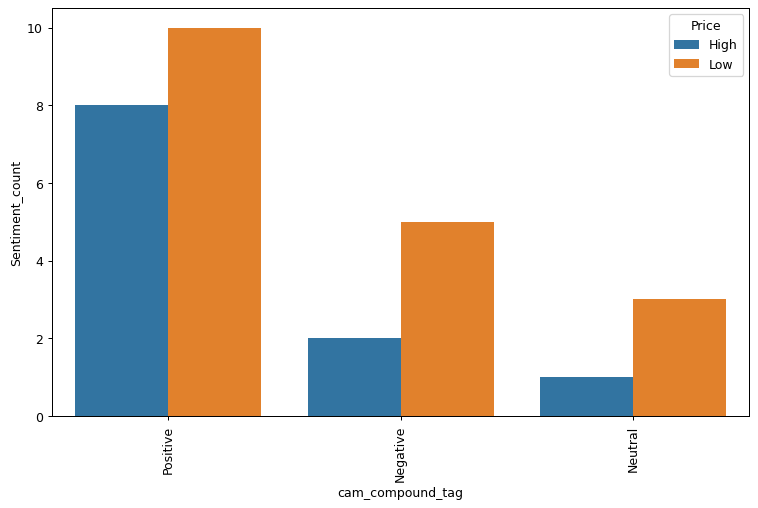

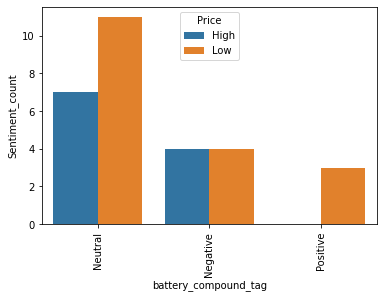

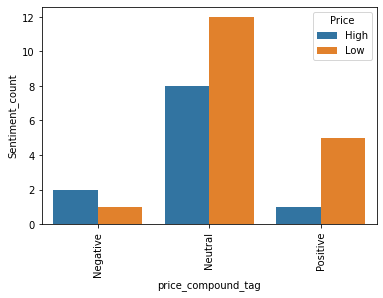

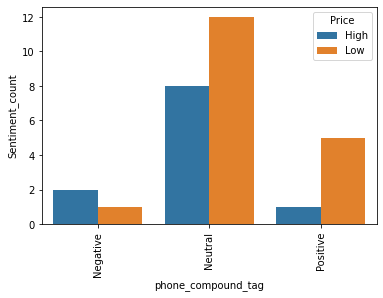

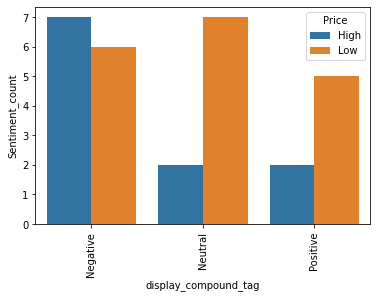

In [308]:
# Data Visualization
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(10, 6), dpi=90)
for feature in final.columns:
    if feature !='Price':
        v=final.copy()
        sns.countplot(x=feature,hue='Price', data=final)
        plt.xlabel(feature)
        plt.ylabel("Sentiment_count")
        plt.xticks(rotation=90)
        plt.show()

In [312]:
# Feature Engineering
data_2=df.copy()
X=data_2[['cam_compound_tag','battery_compound_tag','price_compound_tag','phone_compound_tag','display_compound_tag']]
Y=data_2['Price']

In [313]:
data_3 = pd.get_dummies(X, columns =['cam_compound_tag','battery_compound_tag','price_compound_tag','phone_compound_tag','display_compound_tag'] , drop_first=True)
data_3.head()

,cam_compound_tag_Neutral,cam_compound_tag_Positive,battery_compound_tag_Neutral,battery_compound_tag_Positive,price_compound_tag_Neutral,price_compound_tag_Positive,phone_compound_tag_Neutral,phone_compound_tag_Positive,display_compound_tag_Neutral,display_compound_tag_Positive
3,0,1,1,0,0,0,0,0,0,0
11,0,1,1,0,0,0,0,0,0,0
48,0,1,0,0,1,0,1,0,1,0
63,0,0,0,1,0,1,0,1,1,0
64,0,1,0,0,0,0,0,0,1,0


In [317]:
def price_encoder(x): # Binary encoding for price column
    if x=="High":
        return 1
    else:
        return 0

In [321]:
Y.apply(price_encoder) # Target Columns

3      1
11     1
48     1
63     0
64     0
65     0
66     0
123    0
154    0
156    0
157    0
158    0
159    0
161    0
172    1
180    1
181    1
210    1
212    1
213    1
217    1
219    1
231    0
232    0
241    0
245    0
246    0
252    0
259    0
Name: Price, dtype: int64

In [329]:
from sklearn.model_selection import train_test_split # Train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data_3,Y,test_size=0.1,random_state=42)

In [330]:
from sklearn.ensemble import RandomForestClassifier # Machine Learning model fitting
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [331]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)
CV_rfc.best_params_  # Getting best parameters using grid search CV

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [332]:
random_model = RandomForestClassifier(n_estimators=200,random_state=0, criterion='gini',max_depth=4,max_features='auto')
random_model.fit(X_train, Y_train)



y_pred = random_model.predict(X_test)




print('Model accuracy with Best Parameters : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)*100))

Model accuracy with Best Parameters : 66.6667
